### Analyzes the decision boundary topology of the simple two class data using the plain- and locally-scaled- labeled VR (P-LVR and LS-LVR) complexes

In [1]:
# Load packages
import sys
sys.path.append("src")
import sys
import numpy as np
if 'src' not in sys.path:
    sys.path.append("src")
n_jobs = 4 #General multi-processing jobs

from shapes2D import disk2D, annulus2D
from time import time

# Import TDA package
import TopologicalData

In [2]:
# Create simple 2-class data
r1 = 0.5
r2 = 1.0
r3 = 2.0
ns1 = 200
ns2 = 100

d1 = disk2D((0,0),r1).samples(ns1)
d2 = disk2D((15,15),5*r1).samples(ns1)
x1 = np.vstack((d1,d2))
y1 = np.ones(x1.shape[0])

a1 = annulus2D((0,0),r2,r3).samples(ns2)
a2 = annulus2D((15,15),5.0*r2,5.0*r3).samples(ns2)
x2 = np.vstack((a1,a2))
y2 = -1.0*np.ones(x2.shape[0])

x = np.vstack([x1, x2])
y = np.hstack([y1, y2])
print(x.shape, y.shape)

(600, 2) (600,)


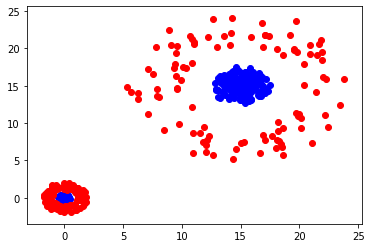

In [3]:
# plot data
import matplotlib.pyplot as plt
import matplotlib.collections  as mc
%matplotlib inline


plt.scatter(x1[:,0], x1[:,1], color = 'b')
plt.scatter(x2[:,0], x2[:,1], color = 'r')

### Compute P-LVR complexes (with Cython speedup)

N adjusted to 20 based on requested max nearest neighbors
0.1340939998626709
Using ripser for computing PH
dimension 0
dimension 1
1.6080098152160645


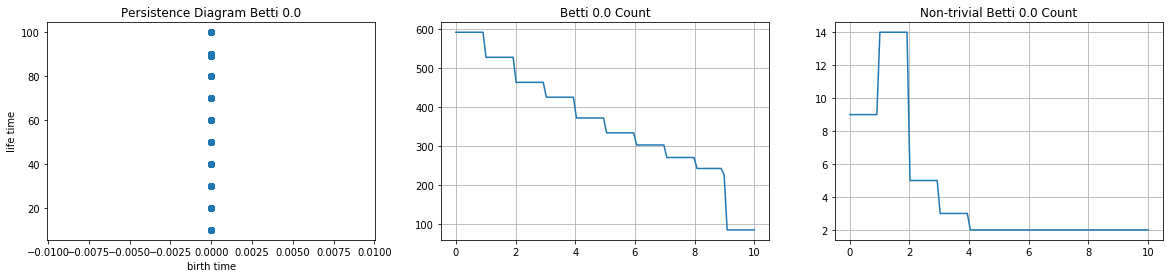

In [4]:
## Number of filtrations
numFilt = 100 

k = np.linspace(0, 10, numFilt)
ta = time()
t = TopologicalData.TopologicalData(x, y, graphtype = "knn", scale = k, 
                                    k = 3, showComplexes = False, saveComplexes = False,
                                    use_cy = True, N = 20, exptid = "knn_2cls_cy_N_20",
                                    PH_program = "ripser", maxdim = 1)
print(time()-ta)
tb = time()
t.run()
print(time()-tb)

### Compute P-LVR complexes (without Cython speedup) - may take a while to execute

2.2230169773101807
Using ripser for computing PH
dimension 0
dimension 1
1.4485208988189697


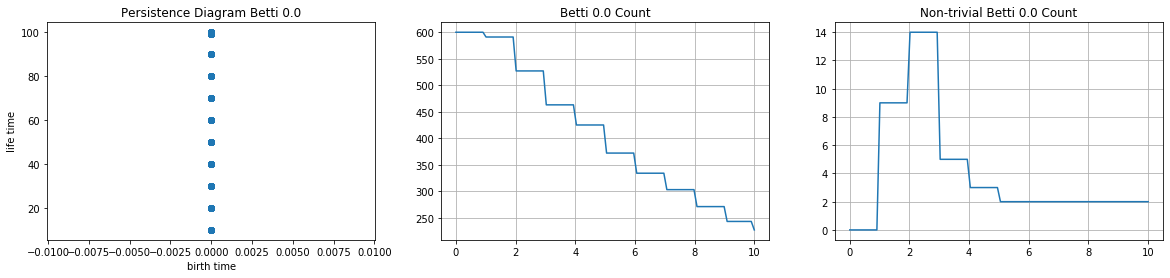

In [5]:
# Number of filtrations
numFilt = 100 

k = np.linspace(0, 10, numFilt)
ta = time()
t = TopologicalData.TopologicalData(x, y, graphtype = "knn", scale = k, 
                                    k = 3, showComplexes = False, saveComplexes = False,
                                    use_cy = False, exptid = "knn_2cls_nocy",
                                    PH_program = "ripser", 
                                    maxdim = 1)
print(time()-ta)
tb = time()
t.run()
print(time()-tb)

### Compute LS-LVR complexes (with Cython speedup)

0.1414940357208252
Using ripser for computing PH
dimension 0
dimension 1
1.5130577087402344


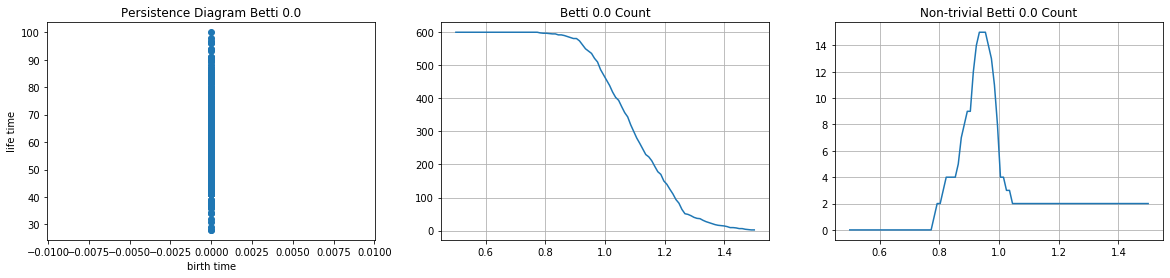

In [6]:
# Number of filtrations
numFilt = 100 

r = np.linspace(0.5, 1.5, numFilt)
ta = time()
t = TopologicalData.TopologicalData(x, y, graphtype = "knn_rho", scale = r, 
                                    k = 3, showComplexes = False, saveComplexes = False,
                                    use_cy = True, N = 20, exptid = "knn_rho_2cls_cy_N_20",
                                    PH_program = "ripser", 
                                    maxdim = 1)
print(time()-ta)
tb = time()
t.run()
print(time()-tb)

### Compute LS-LVR complexes (without Cython speedup) - may take a while to execute

0.6143631935119629
Using ripser for computing PH
dimension 0
dimension 1
1.6967527866363525


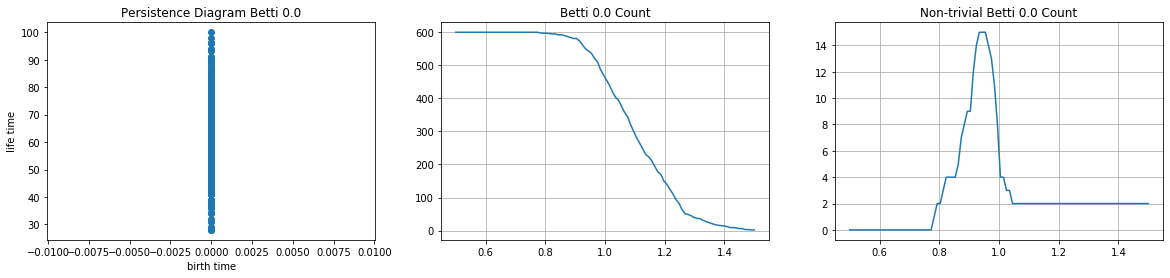

In [7]:
# Number of filtrations
numFilt = 100 

r = np.linspace(0.5, 1.5, numFilt)
ta = time()
t = TopologicalData.TopologicalData(x, y, graphtype = "knn_rho", scale = r, 
                                    k = 3, showComplexes = False, saveComplexes = False,
                                    use_cy = False, exptid = "knn_rho_2cls_nocy",
                                    PH_program = "ripser", 
                                    maxdim = 1)
print(time()-ta)
tb = time()
t.run()
print(time()-tb)